In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [2]:
x = numpy.arange(-5,5,0.1)
y = numpy.arange(-5,5,0.1)

In [3]:
#define the Joukowski transformation

def j_trans(z,c):
    """
    Joukowski transfer:
    z_trans = z + (c**2)/z
    Parameters:
    
    z: the number you want to do Joukowski transfer, it can be a complex number or an array
    c: the constant in the Joukowski transfer
    ---
    Return:
    
    j_trans: the transfer result
    """
    j_trans = z + c**2/z
    return j_trans

In [4]:
#define functions to plot
def plot_scatters(x,y):
    pyplot.figure(figsize = (5,5))
    pyplot.xlim(-5,5)
    pyplot.ylim(-5,5)
    pyplot.scatter(x,y,s=1,color='r')
    
def plot_streamlines_via_streamfunction(X,Y,psi):
    pyplot.figure(figsize=(5,5))
    pyplot.xlim(-5,5)
    pyplot.ylim(-5,5)
    pyplot.contour(X,Y,psi,levels = numpy.linspace(-5,5,71))
    
def plot_velocity(X,Y,u,v):
    pyplot.figure(figsize=(5,5))
    pyplot.xlim(-2,2)
    pyplot.ylim(-2,2)
    pyplot.quiver(X,Y,u,v,units='xy',pivot='mid',width=0.005,scale=40)

def plot_cp(X,Y,cp):
    pyplot.figure(figsize=(6,5))
    pyplot.xlim(-5,5)
    pyplot.ylim(-5,5)
    contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-1.0, 1.0, 100), extend='both')
    cbar = pyplot.colorbar(contf)

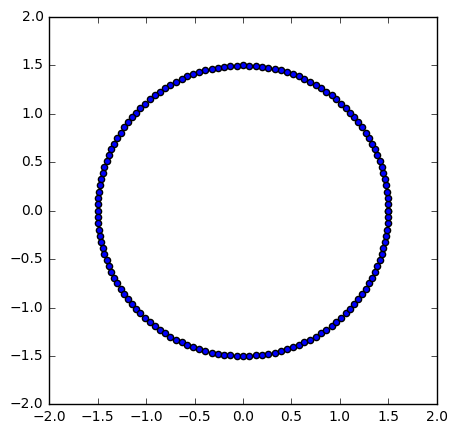

In [5]:
#using the polar coordinate system to draw a circle

theta = numpy.linspace(0,2*math.pi,145)
R = 1.5                                          #radius
c = 1.                                           #some kinds of constant, we use c = 1 here
x_circle = R*numpy.cos(theta)                    
y_circle = R*numpy.sin(theta)

#plot the circle to see if it's right 
pyplot.figure(figsize=(5,5))
pyplot.scatter(x_circle,y_circle)

In [6]:
#transform from z plane to xi plane

z = x_circle + y_circle*1j
z_jtrans = j_trans(z,c)

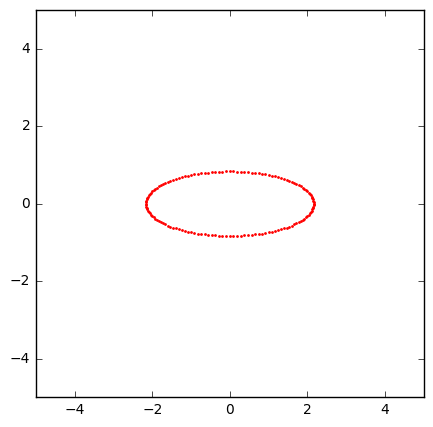

In [7]:
plot_scatters(z_jtrans.real, z_jtrans.imag)

In [8]:
#the second case, with R = 1.2, c = 1, center at (x,y) = (c-R,0)

R_2 = 1.2
c_2 = 1.
x_2 = c_2 - R_2 + R_2*numpy.cos(theta)
y_2 = R_2*numpy.sin(theta)

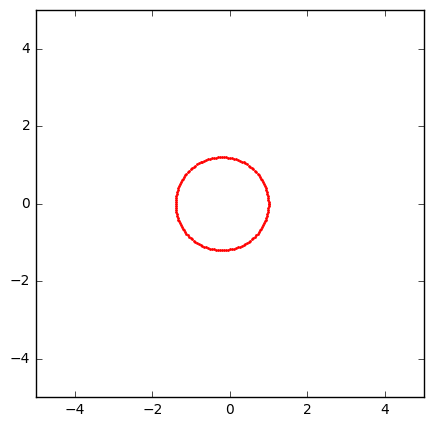

In [9]:
plot_scatters(x_2,y_2)

In [10]:
#transfer the second case to xi plane

z_2 = x_2 +1j*y_2
z_2trans = j_trans(z_2,c)

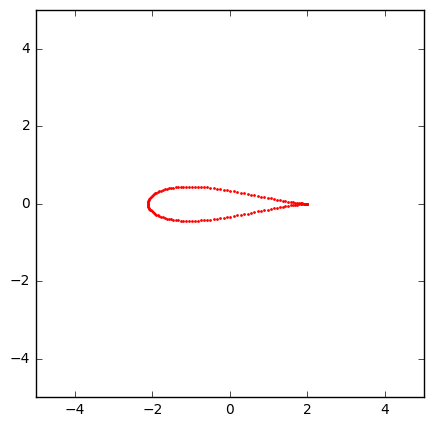

In [11]:
#plot the transfer result of the second case

plot_scatters(z_2trans.real,z_2trans.imag)

---

In [12]:
#the third case: the circle is centered at (-delta_x,delta_y),
#with radius R = ((c-(-delta_x))**2 + delta_y**2)**0.5

delta_x = 0.1
delta_y = 0.1
R_3 = ((c-(-delta_x))**2 + delta_y**2)**0.5

In [13]:
#transform to xi plane

x_3 = -delta_x +R_3*numpy.cos(theta)
y_3 = R_3*numpy.sin(theta)+delta_y
z_3 = x_3+y_3*1j
z_3trans = j_trans(z_3,c)

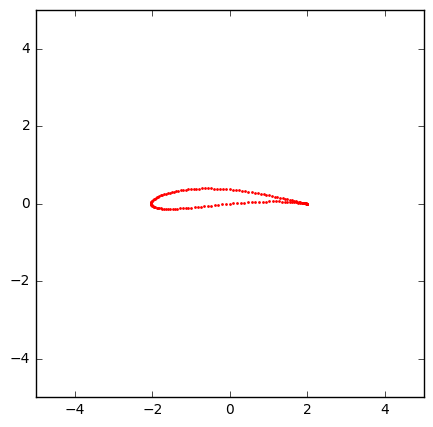

In [14]:
plot_scatters(z_3trans.real,z_3trans.imag)

---

In [15]:
#the one that is going to use in the following assignment, R = 1.15, centered at (-0.15,0)


x_center, y_center = -0.15, 0
R_4 = 1.15
x_4 = x_center + R_4*numpy.cos(theta)
y_4 = y_center + R_4*numpy.sin(theta)
z_4 = x_4 + y_4*1j
z_4trans = j_trans(z_4,c)

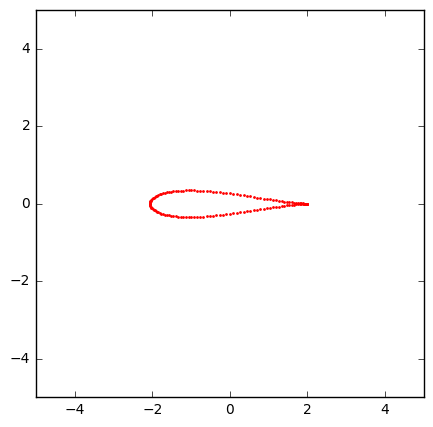

In [16]:
plot_scatters(z_4trans.real,z_4trans.imag)

In [17]:
#make the meshgrids of polar coordinate

N_r = 100
N_theta = 145
r = numpy.linspace(R_4,5,N_r)
theta_4 = numpy.linspace(0,2*math.pi,N_theta)
R,THETA = numpy.meshgrid(r,theta_4)

In [18]:
#calculate the meshgrid points' location on the z plane

X = x_center + R*numpy.cos(THETA)
Y = y_center + R*numpy.sin(THETA)


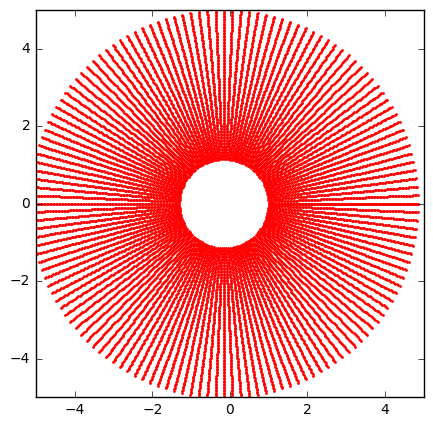

In [19]:
#plot to check the result

plot_scatters(X,Y)

In [20]:
#transform the meshgrid points to xi plane

Z = X+1j*Y
Z_trans=j_trans(Z,c)


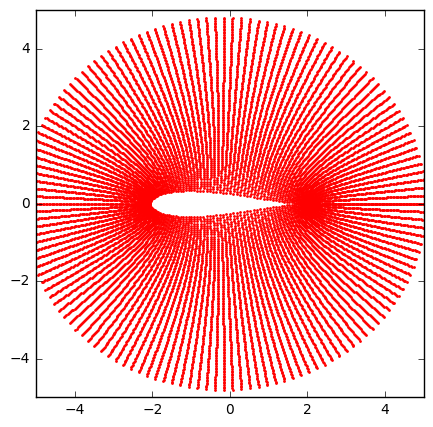

In [21]:
#plot to check the result

plot_scatters(Z_trans.real,Z_trans.imag)

In [22]:
#velocity of the freestream

u_freestream = 1.
v_freestream = 0.
psi_freestream = u_freestream*Y

In [23]:
#doublet and the free stream
kappa = 2*math.pi*R_4**2*u_freestream                         # strength of the doublet
x_doublet, y_doublet = -0.15, 0.0    # location of the doublet

In [24]:
#velocity of the doublet

u_doublet = - kappa/(2*math.pi)*((X-x_center)**2-(Y-y_center)**2)/((X-x_center)**2+(Y-y_center)**2)**2
v_doublet = - kappa/(2*math.pi)*2*(X-x_center)*(Y-y_center)/((X-x_center)**2+(Y-y_center)**2)**2
psi_doublet = -kappa/(2*math.pi)*(Y-y_center)/((X-x_center)**2 +(Y-y_center)**2)

In [25]:
u = u_doublet + u_freestream
v = v_doublet + v_freestream
psi = psi_doublet +psi_freestream

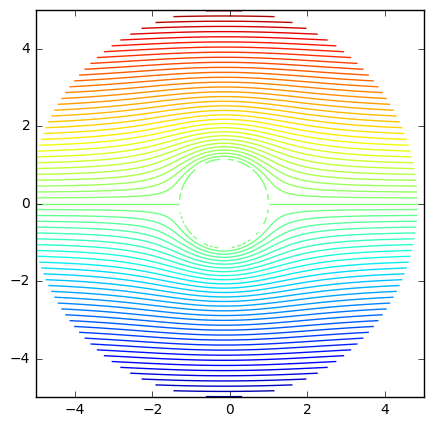

In [26]:
plot_streamlines_via_streamfunction(X,Y,psi)


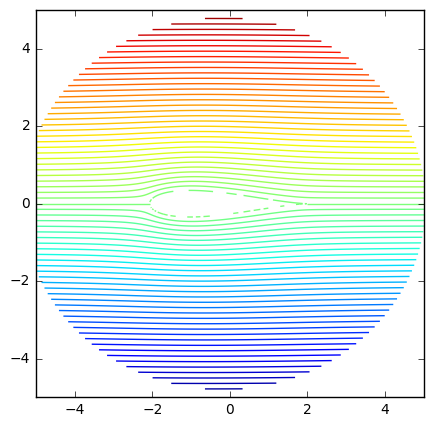

In [27]:
plot_streamlines_via_streamfunction(Z_trans.real,Z_trans.imag,psi)

---

In [28]:
#transfer the velocity to xi plane
def velocity_transfer(u,v,c,Z):

    W_xi = (u - 1j*v)/(1-(c/Z)**2)
    u_xi = W_xi.real
    v_xi = -W_xi.imag
    
    return u_xi,v_xi

In [29]:
u_xi,v_xi = velocity_transfer(u,v,c,Z)

In [30]:
u_xifreestream,v_xifreestream = velocity_transfer(u_freestream,v_freestream,c,Z)

In [31]:
###?does freestream velocity needs to be transfer to j?
W_xifreestream = (u_freestream - 1j*v_freestream)/(1-(c/Z)**2)
u_xifreestream = W_xifreestream.real
v_xifreestream = W_xifreestream.imag

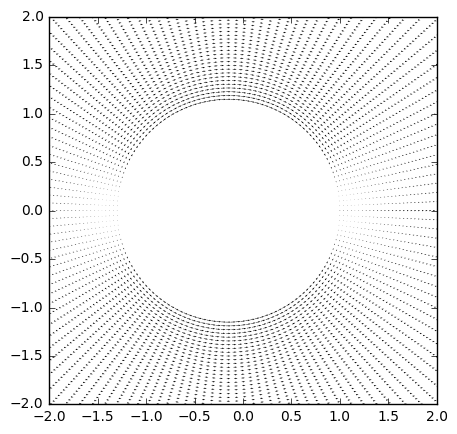

In [32]:
plot_velocity(X,Y,u,v)

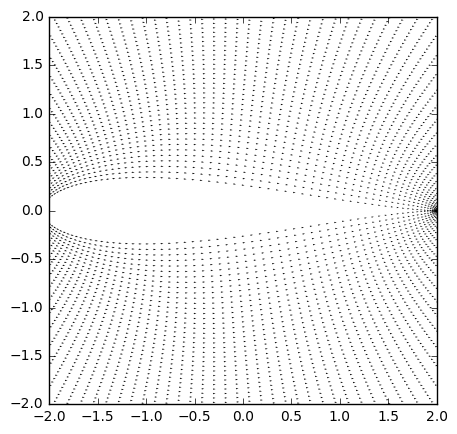

In [33]:
plot_velocity(Z_trans.real,Z_trans.imag,u_xi,v_xi)

In [34]:
print('the strength of the doublet is:',kappa)
print('the u component of the 62th point is:',u_xi[61,0])
print('the v component of the 62th point is:',v_xi[61,0])

the strength of the doublet is: 8.309512568745001
the u component of the 62th point is: 1.10633846629
the v component of the 62th point is: 0.523633349298


In [35]:
cp_z =  1-((u**2 + v**2)/u_freestream**2)
cp_xi = 1-((u_xi**2+v_xi**2)/u_freestream**2)   ###is here still use u_freestream?

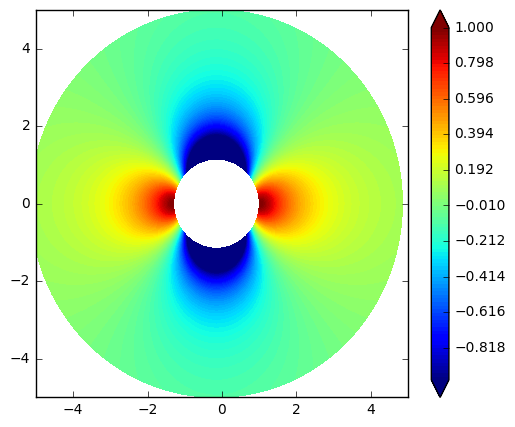

In [36]:
plot_cp(X, Y, cp_z)

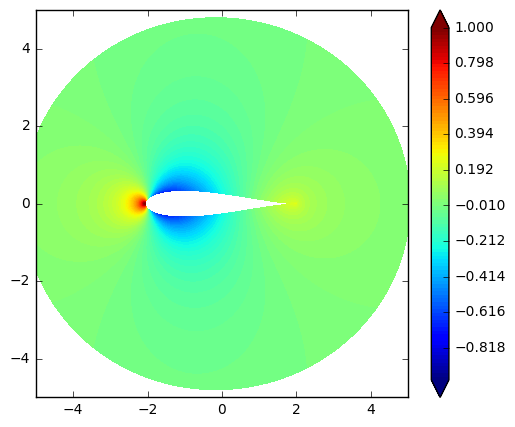

In [37]:
plot_cp(Z_trans.real, Z_trans.imag, cp_xi)

In [38]:
print('the smallest cp on the surface is:',numpy.min(cp_xi[:,0]))

the smallest cp on the surface is: -0.687755674092


---

In [39]:
#angle of attack
AoA = 20/180 * math.pi

#new plane centered at the doublet, with angle AoA to the original plane
xprime =  (X-x_center)*numpy.cos(AoA)+(Y-y_center)*numpy.sin(AoA)
yprime = -(X-x_center)*numpy.sin(AoA)+(Y-y_center)*numpy.cos(AoA)

In [40]:
#这个不成立：是doublet在原先的XY坐标系中，freestream在新的转了20度的坐标系中，图特别丑
#u_doublet2 = -kappa/(2*math.pi)*((X-x_center)**2-(Y-y_center)**2)/((X-x_center)**2+(Y-y_center)**2)**2
#v_doublet2 = -kappa/(2*math.pi)*(2*(X-x_center)*(Y-y_center))/((X-x_center)**2+(Y-y_center)**2)**2
#psi_doublet2 = -kappa/(2*math.pi)*(Y-y_center)/((X-x_center)**2+(Y-y_center**2))

In [41]:
#doublet in the zprime plane, centered at origin, 
u_doublet2 = -kappa/(2*math.pi)*(xprime**2 - yprime**2)/\
               (xprime**2+yprime**2)**2
v_doublet2 = -kappa/(2*math.pi)*(2*xprime*yprime)/  \
             (xprime**2+yprime**2)**2
psi_doublet2 = -kappa/(2*math.pi)*yprime/(xprime**2+yprime**2)

In [42]:
#the velocity and the streamfunction of the freestream in the zprime plane
u_freestream2 = 1
v_freestream2 = 0
psi_freestream2 = yprime

In [43]:
#total velocity and streamfunction
u2prime = u_doublet2 + u_freestream2
v2prime = v_doublet2 + v_freestream2
psi2 = psi_doublet2 + psi_freestream2

In [44]:
velocity2 = (u2prime - 1j*v2prime)*numpy.exp(-1j*AoA)
u2 =  velocity2.real
v2 = -velocity2.imag

#u2 = u2prime*numpy.cos(AoA) - v2prime*numpy.sin(AoA)
#v2 = u2prime*numpy.sin(AoA) + v2prime*numpy.cos(AoA)

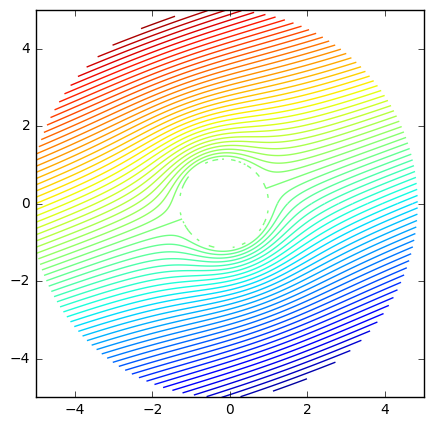

In [45]:
plot_streamlines_via_streamfunction(X,Y,psi2)

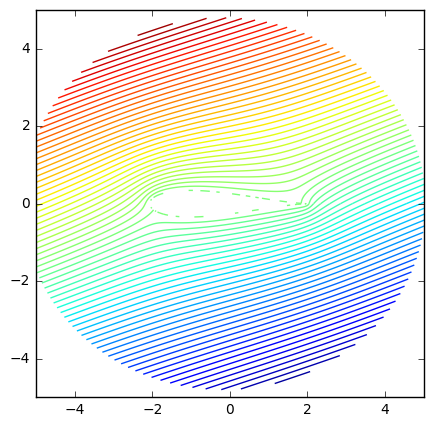

In [46]:
plot_streamlines_via_streamfunction(Z_trans.real,Z_trans.imag,psi2)

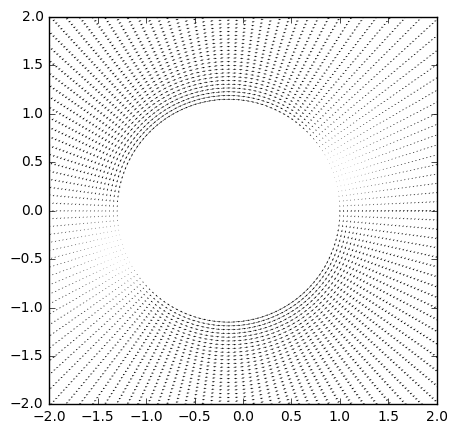

In [47]:
plot_velocity(X,Y,u2,v2)

In [48]:
u_xi2, v_xi2 = velocity_transfer(u2,v2,c,Z)

In [49]:
print('the u component of 50th point is:', u_xi2[49,0])
print('the v component of 50th point is:', v_xi2[49,0])

the u component of 50th point is: 1.48306541501
the v component of 50th point is: 0.0920754950073


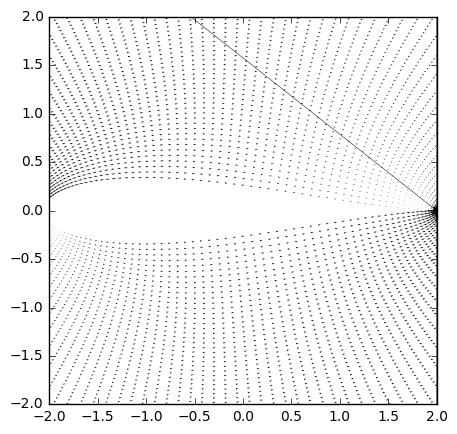

In [50]:
plot_velocity(Z_trans.real,Z_trans.imag,u_xi2,v_xi2)

In [51]:
cp_z2 =  1-((u2**2 + v2**2)/u_freestream**2)


In [52]:
UU = (u2**2+v2**2)**0.5
second_point=sorted(UU[:,0])[1]

print('the first stagnation point is at:',numpy.where(UU == numpy.min(UU))[0][0]+1)
print('the second stagnation point is at:',numpy.where(UU==second_point)[0][0]+1)

the first stagnation point is at: 81
the second stagnation point is at: 9


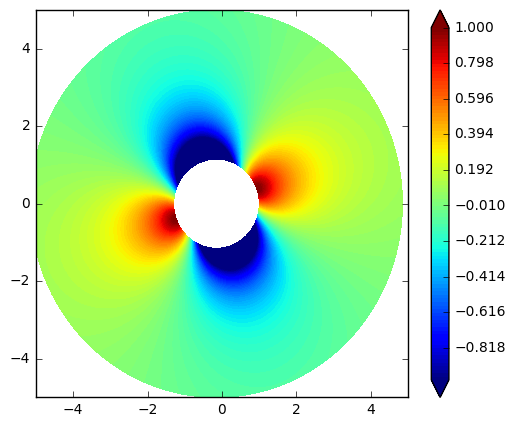

In [53]:
plot_cp(X, Y, cp_z2)

In [54]:
cp_xi2 = 1-((u_xi2**2+v_xi2**2)/u_freestream**2)

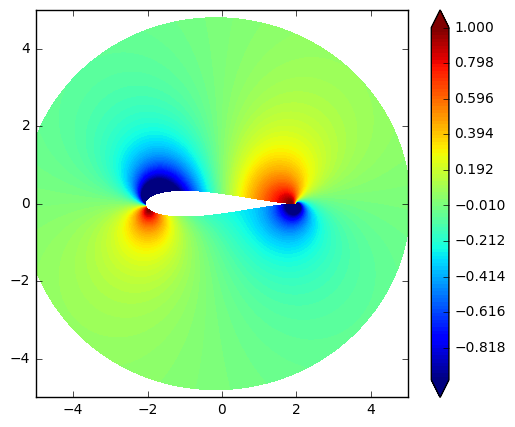

In [55]:
plot_cp(Z_trans.real, Z_trans.imag, cp_xi2)

---

In [56]:
print('the u component of the 50th point is:',u_xi2[49,0])
print('the v component of the 50th point is:',v_xi2[49,0])
print('the cp at the 75th point is:',cp_xi2[74,0])

the u component of the 50th point is: 1.48306541501
the v component of the 50th point is: 0.0920754950073
the cp at the 75th point is: -0.485209916437


---

---

In [57]:
gamma = -4*u_freestream*numpy.sin(-AoA)*math.pi*R_4            #here we use -AoA because we want to rotate the AoA clock wise for 20 degree
print('the strength of the vortex is:',gamma)

the strength of the vortex is: 4.9426446604


In [58]:
#vortex velocity field, centered at x_center, y_center

u_vortex =  gamma/(2*math.pi)*yprime/(xprime**2+yprime**2)
v_vortex = -gamma/(2*math.pi)*xprime/(xprime**2+yprime**2)
psi_vortex=gamma/(4*math.pi)*numpy.log(xprime**2+yprime**2)

In [59]:
#the total velocity,u2prime(also v2prime, psi2) include freestream and the doublet

u3prime = u_vortex+u2prime
v3prime = v_vortex+v2prime
psi3prime = psi_vortex+psi2

In [60]:
#change the velocity in the xprime,yprime plane to x,y plane

velocity3 = (u3prime - 1j*v3prime)*numpy.exp(-1j*AoA)
u3 = velocity3.real
v3 = -velocity3.imag

In [61]:
u3[91,0]

0.17654617487025515

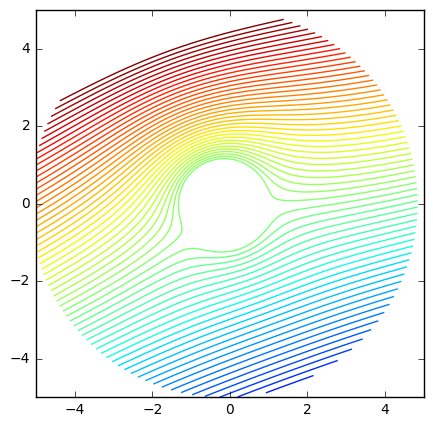

In [62]:
plot_streamlines_via_streamfunction(X,Y,psi3prime)

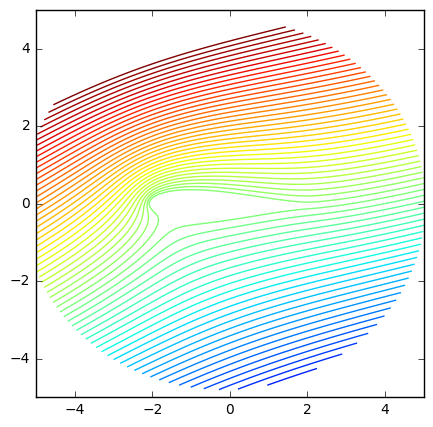

In [63]:
plot_streamlines_via_streamfunction(Z_trans.real,Z_trans.imag,psi3prime)

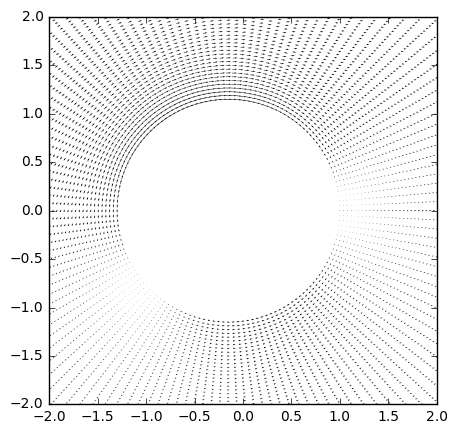

In [64]:
plot_velocity(X,Y,u3,v3)

In [65]:
u_xi3,v_xi3=velocity_transfer(u3,v3,c,Z)

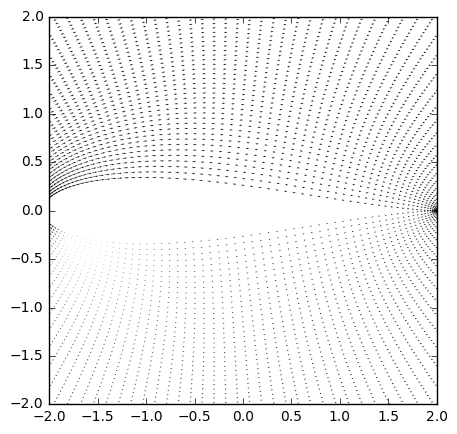

In [66]:
plot_velocity(Z_trans.real,Z_trans.imag,u_xi3,v_xi3)

In [67]:
#calculate the pressure coefficient in xy plane and x_xi,y_xi plane

cp_z3 =  1-((u3**2 + v3**2)/u_freestream**2)
cp_xi3 = 1-((u_xi3**2+v_xi3**2)/u_freestream**2)

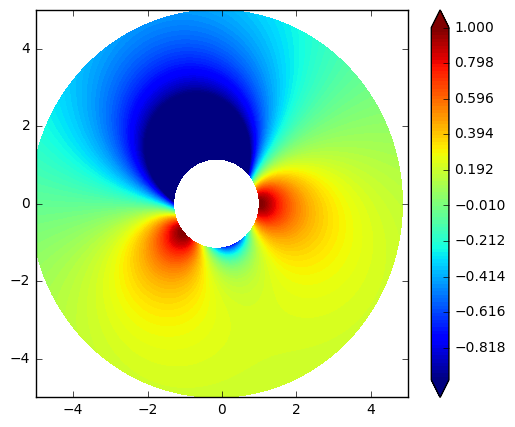

In [68]:
plot_cp(X, Y, cp_z3)

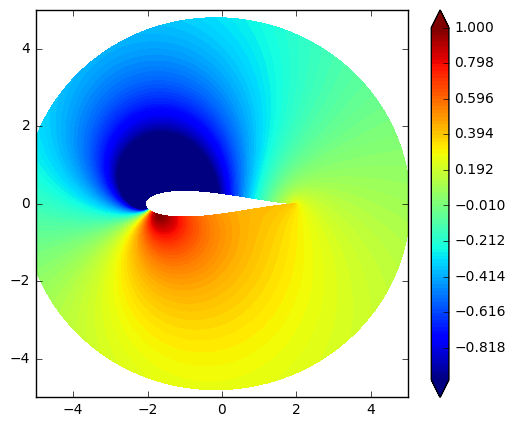

In [69]:
plot_cp(Z_trans.real, Z_trans.imag, cp_xi3)

In [70]:
UU2 = (u_xi3**2+v_xi3**2)**0.5
numpy.where(UU2 == numpy.min(UU2))

(array([88], dtype=int64), array([0], dtype=int64))

In [71]:
UU2 = (u_xi3**2+v_xi3**2)**0.5
second_point2=sorted(UU2[:,0])[10]

print('the first stagnation point is at:',numpy.where(UU2 == numpy.min(UU2))[0][0]+1)
print('the second stagnation point is at 1 because thats how we code them!!')

the first stagnation point is at: 89
the second stagnation point is at 1 because thats how we code them!!


In [72]:
print('the u component of the 92th point is:',u_xi3[91,0])
print('the v component of the 92th point is:',v_xi3[91,0])
print('the cp of the 111th point is:',cp_xi3[110,0])

the u component of the 92th point is: 0.208483116207
the v component of the 92th point is: -0.0319883891951
the cp of the 111th point is: 0.496694672383



---

In [75]:
p = cp_z3[1:,0]*0.5   #since it's integral around a circle, p_inf cancels as pairs, and we regard the density = 1, p = 2 cp


lift = -p*numpy.cos(THETA[1:,0])*R_4*(2*math.pi/144)

In [76]:
numpy.sum(lift)

-1.6904840351570329